In [2]:
# https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

| **Column**                     | **Description**                                   | **Type**    |
|--------------------------------|---------------------------------------------------|-------------|
| person_age                     | Age of the person                                 | Float       |
| person_gender                  | Gender of the person                              | Categorical |
| person_education               | Highest education level                           | Categorical |
| person_income                  | Annual income                                     | Float       |
| person_emp_exp                 | Years of employment experience                    | Integer     |
| person_home_ownership          | Home ownership status (e.g., rent, own, mortgage) | Categorical |
| loan_amnt                      | Loan amount requested                             | Float       |
| loan_intent                    | Purpose of the loan                               | Categorical |
| loan_int_rate                  | Loan interest rate                                | Float       |
| loan_percent_income            | Loan amount as a percentage of annual income      | Float       |
| cb_person_cred_hist_length     | Length of credit history in years                 | Float       |
| credit_score                   | Credit score of the person                        | Integer     |
| previous_loan_defaults_on_file | Indicator of previous loan defaults               | Categorical |
| loan_status (target variable)  | Loan approval status: 1 = approved; 0 = rejected  | Integer     |


In [5]:
data = pd.read_csv("loan_data.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [8]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [9]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


>To ensure that the `person_gender` feature can be utilized by machine learning algorithms,  its categorical values have been mapped to numerical representations:
>
>**male = 0**, **female = 1**.

In [10]:
data["person_gender"].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [11]:
data["person_gender"] = data["person_gender"].map({"male":0, "female":1})

In [12]:
data["person_gender"].value_counts()

person_gender
0    24841
1    20159
Name: count, dtype: int64

> After data visualization, it was observed that the target variable does not show a clear ordinal relationship with education levels. For this reason, applying an **`Ordinal Encoder`** would not be appropriate.
>
> Instead, the feature will be encoded using **`One-Hot Encoding`**, which treats each education level as a separate, non-ordered category.

In [13]:
data["person_education"].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [14]:
data["person_home_ownership"].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [15]:
data["loan_intent"].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

The `previous_loan_defaults_on_file` column indicates whether the person has any previous loan defaults. Since this is a binary categorical variable, it has been mapped into numerical form for machine learning compatibility:
- "No" → 0
- "Yes" → 1

This transformation represents a **binary encoding**, allowing models to interpret the feature numerically.

In [16]:
data["previous_loan_defaults_on_file"].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

In [17]:
data["previous_loan_defaults_on_file"] = data["previous_loan_defaults_on_file"].map({"No": 0, "Yes": 1})

In [18]:
data["previous_loan_defaults_on_file"].value_counts()

previous_loan_defaults_on_file
1    22858
0    22142
Name: count, dtype: int64

In [19]:
data["loan_status"].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# Exploratory Data Analysis (EDA)

> To explore the numerical features in the loan approval dataset, I plotted the distributions of all float-type columns. Each subplot shows a histogram with a Kernel Density Estimation (KDE) curve, which helps to visualize the spread, skewness, and potential outliers in the data.

In [21]:
import math

def all_hist(data, title_pre = ""):
    num_cols = data.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(4*n_rows, 5*n_cols))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f"{title_pre} {col}")
        plt.xlabel("")

    plt.tight_layout()
    plt.show()

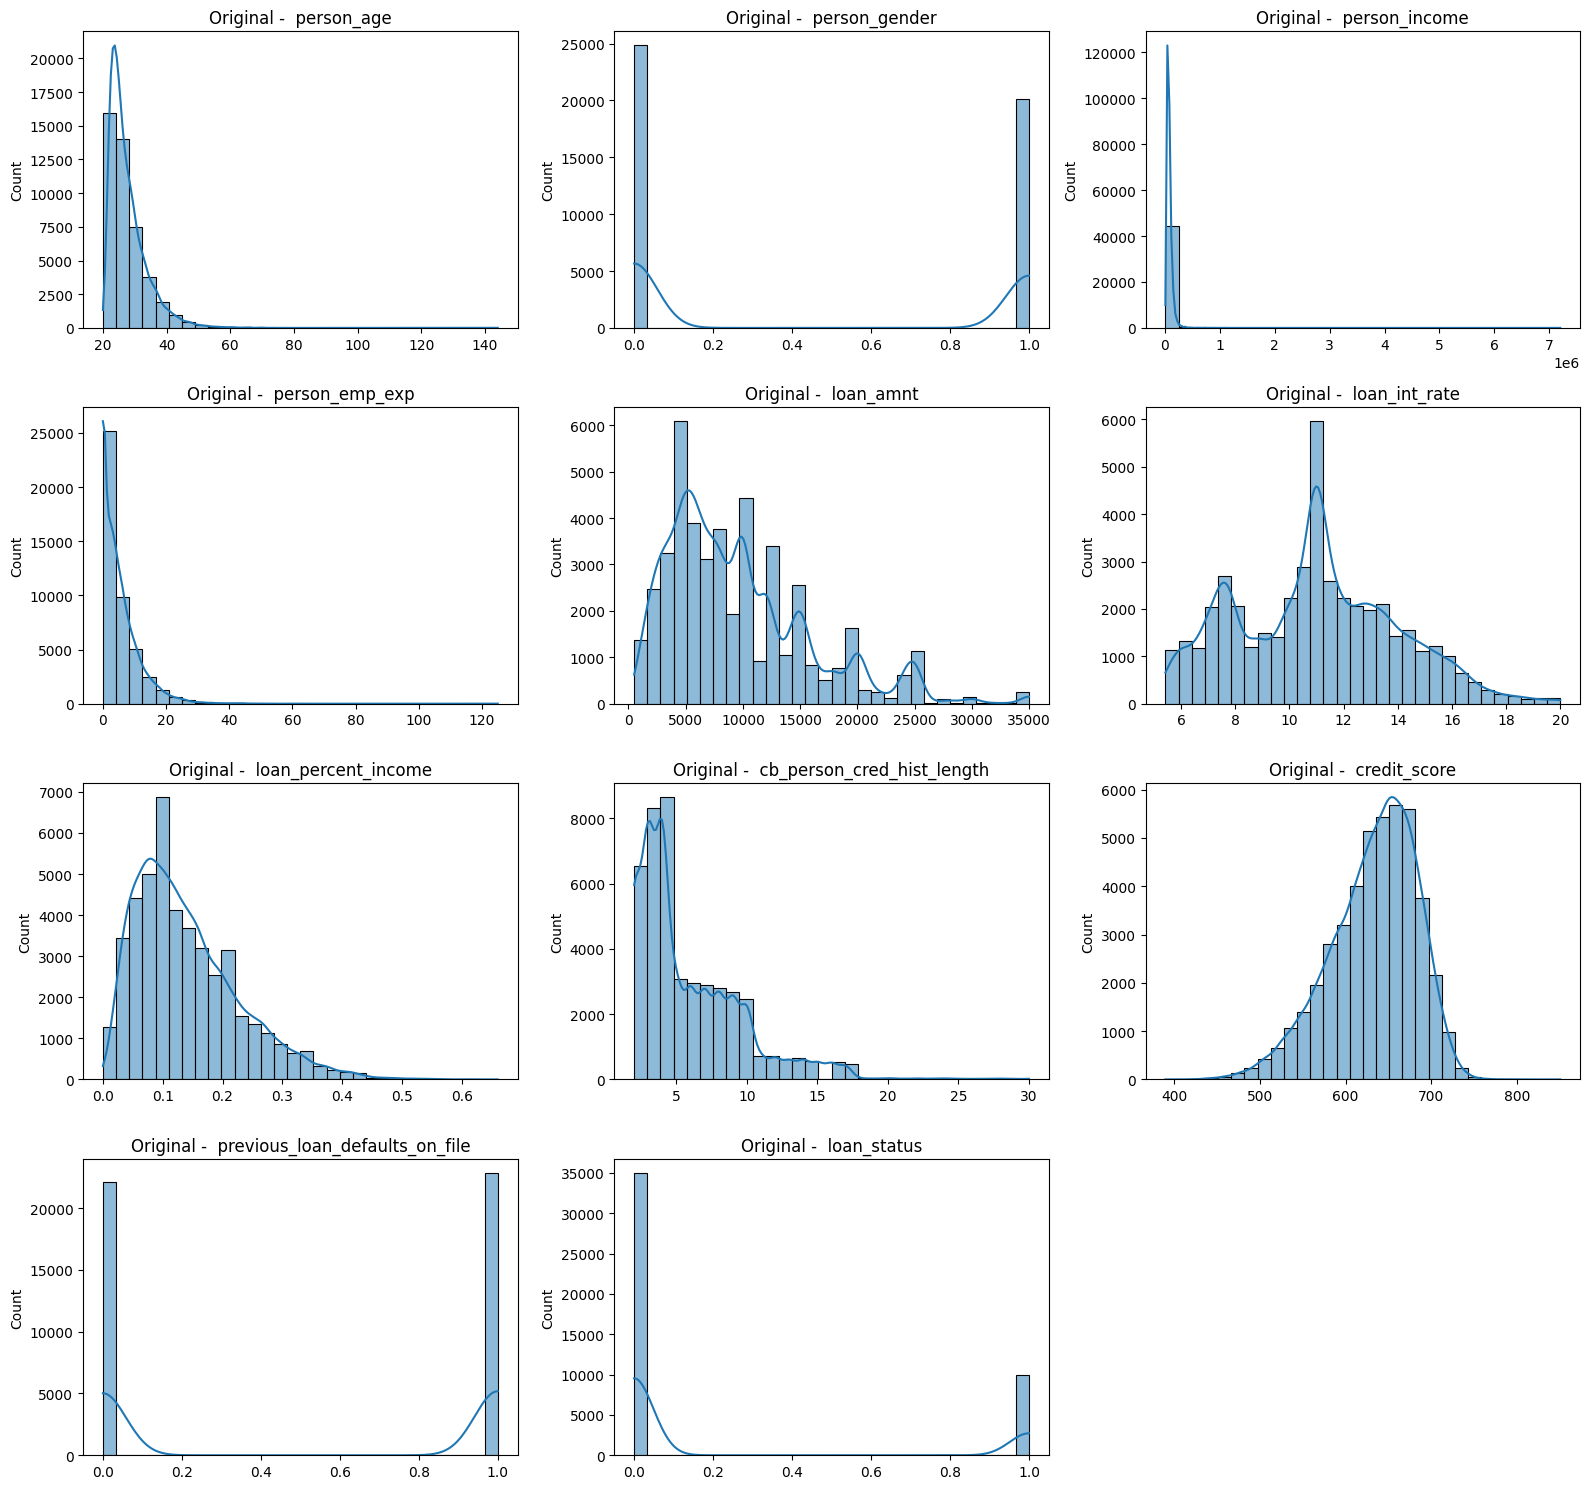

In [22]:
all_hist(data, title_pre="Original - ")

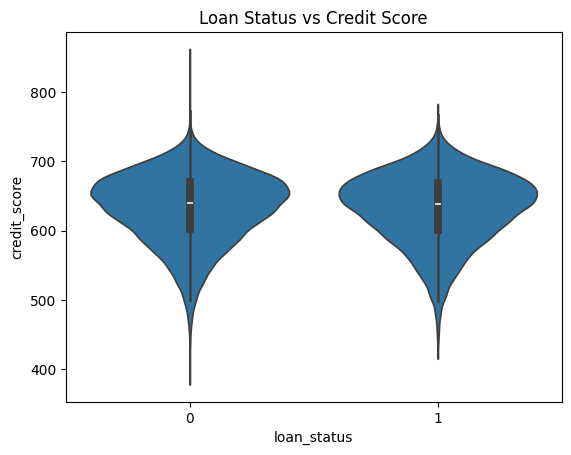

In [23]:
sns.violinplot(x='loan_status', y='credit_score', data=data)
plt.title("Loan Status vs Credit Score")
plt.show()

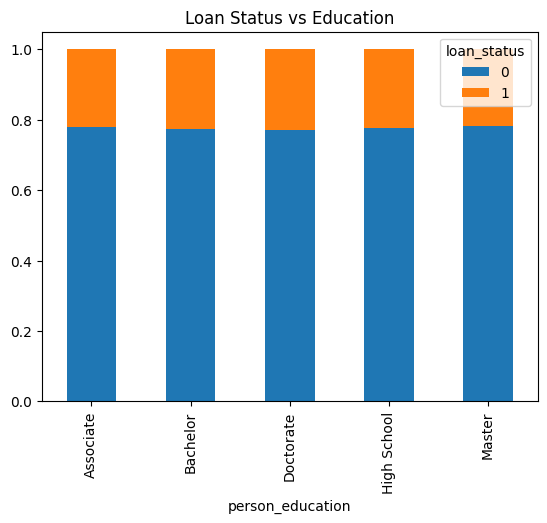

In [24]:
pd.crosstab(data['person_education'], data['loan_status'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Loan Status vs Education")
plt.show()

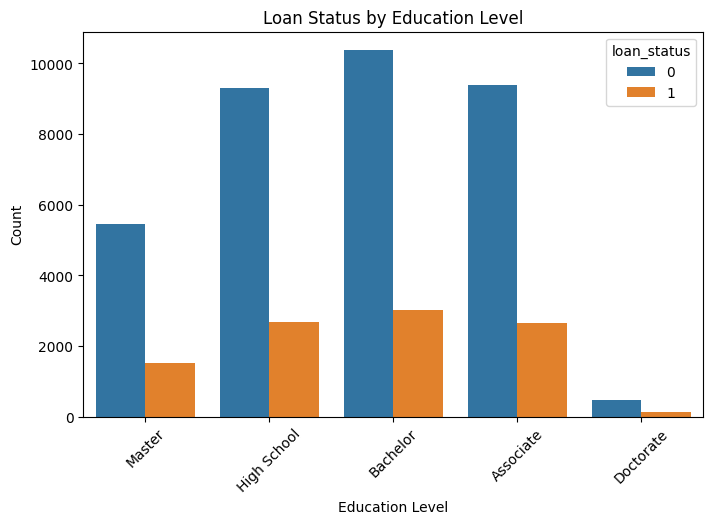

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x="person_education", hue="loan_status")
plt.title("Loan Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

> Boxplots were created to detect potential outliers in numerical features based on the **`loan_status`** variable. The following numeric columns were used in the analysis. These boxplots provide insights into data distribution, central tendency, and the presence of outliers for each variable relative to loan approval status.

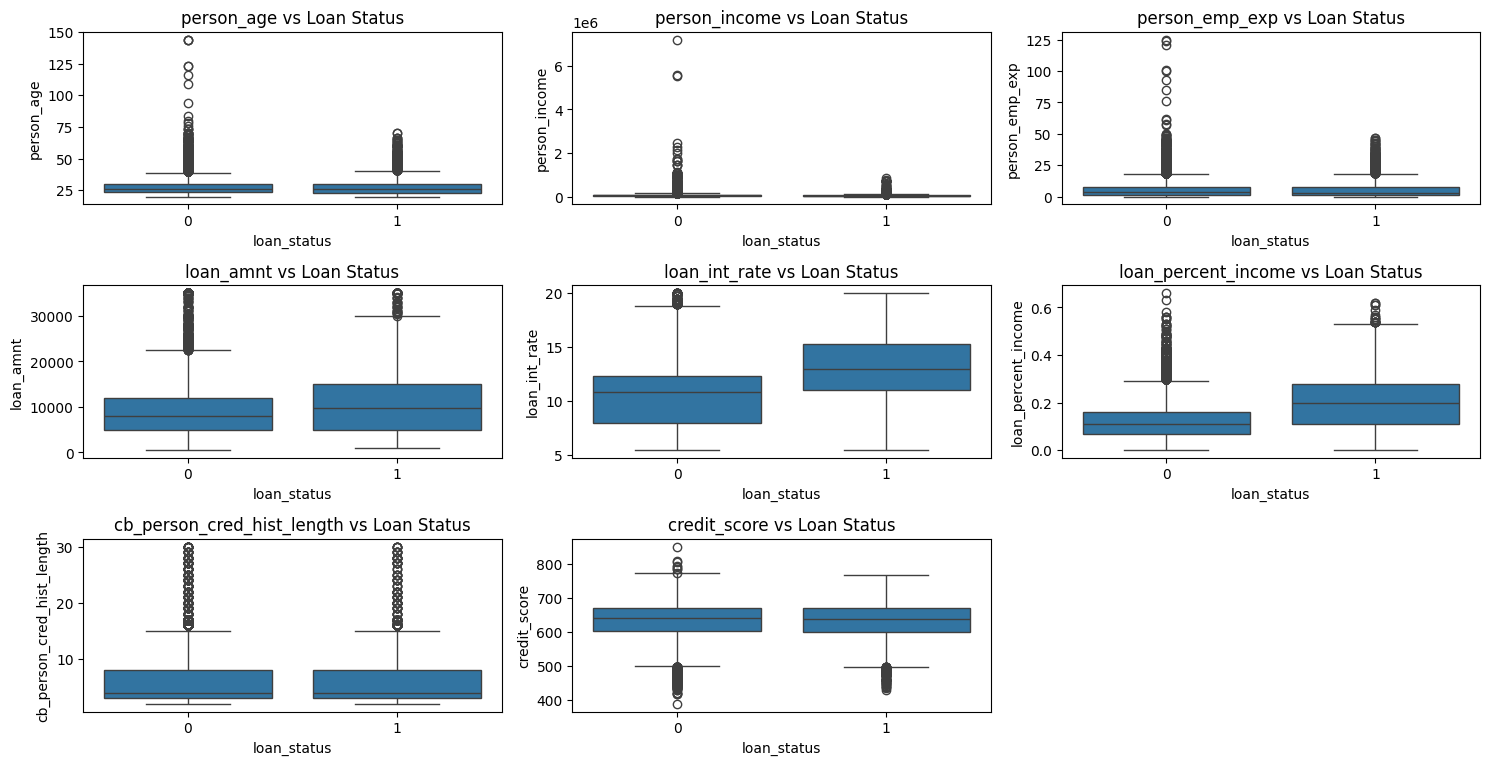

In [26]:
numeric_cols = [
    'person_age', 'person_income', 'person_emp_exp',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length', 'credit_score'
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 3, i+1)
    sns.boxplot(x='loan_status', y=col, data=data)
    plt.title(f'{col} vs Loan Status')
    plt.tight_layout()
plt.show()


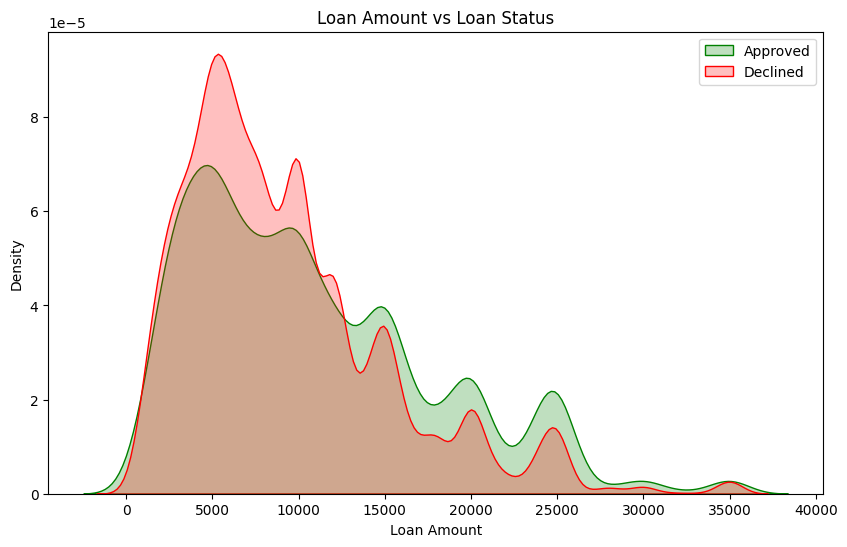

In [27]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data[data['loan_status'] == 1], x='loan_amnt', label='Approved', fill=True, color='green')
sns.kdeplot(data=data[data['loan_status'] == 0], x='loan_amnt', label='Declined', fill=True, color='red')
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

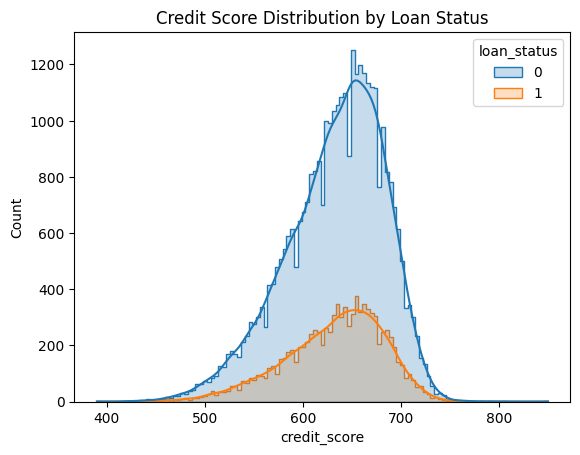

In [28]:
sns.histplot(data=data, x='credit_score', hue='loan_status', kde=True, element="step")
plt.title('Credit Score Distribution by Loan Status')
plt.show()

In [29]:
data.corr(numeric_only=True)

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,-0.017528,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.025917,-0.021476
person_gender,-0.017528,1.000000,-0.010173,-0.015078,-0.010647,-0.003662,0.000367,-0.011999,0.000223,-0.000704,0.000561
person_income,0.193698,-0.010173,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,0.061483,-0.135808
person_emp_exp,0.954412,-0.015078,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.029231,-0.020481
loan_amnt,0.050750,-0.010647,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,-0.059009,0.107714
loan_int_rate,0.013402,-0.003662,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,-0.181800,0.332005
loan_percent_income,-0.043299,0.000367,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,-0.203252,0.384880
cb_person_cred_hist_length,0.861985,-0.011999,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.022640,-0.014851
credit_score,0.178432,0.000223,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.183005,-0.007647
previous_loan_defaults_on_file,-0.025917,-0.000704,0.061483,-0.029231,-0.059009,-0.181800,-0.203252,-0.022640,-0.183005,1.000000,-0.543096


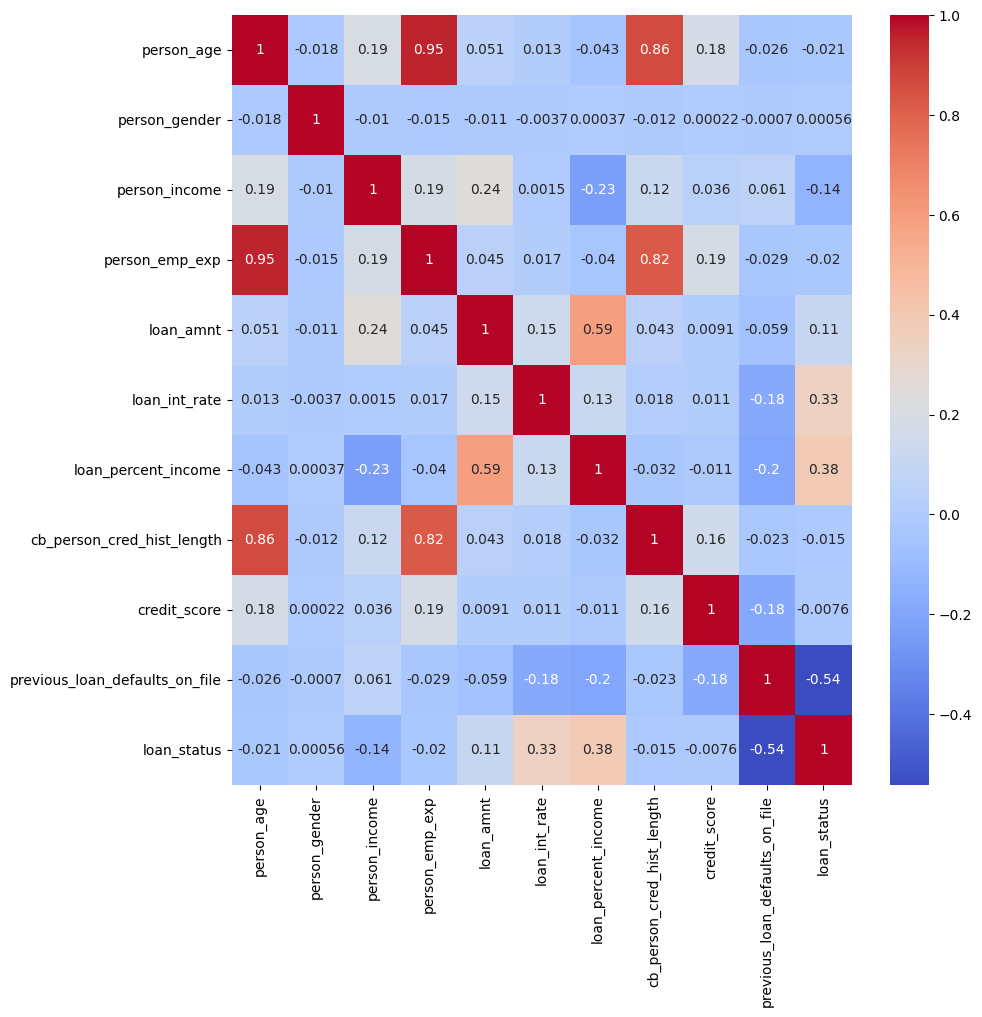

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

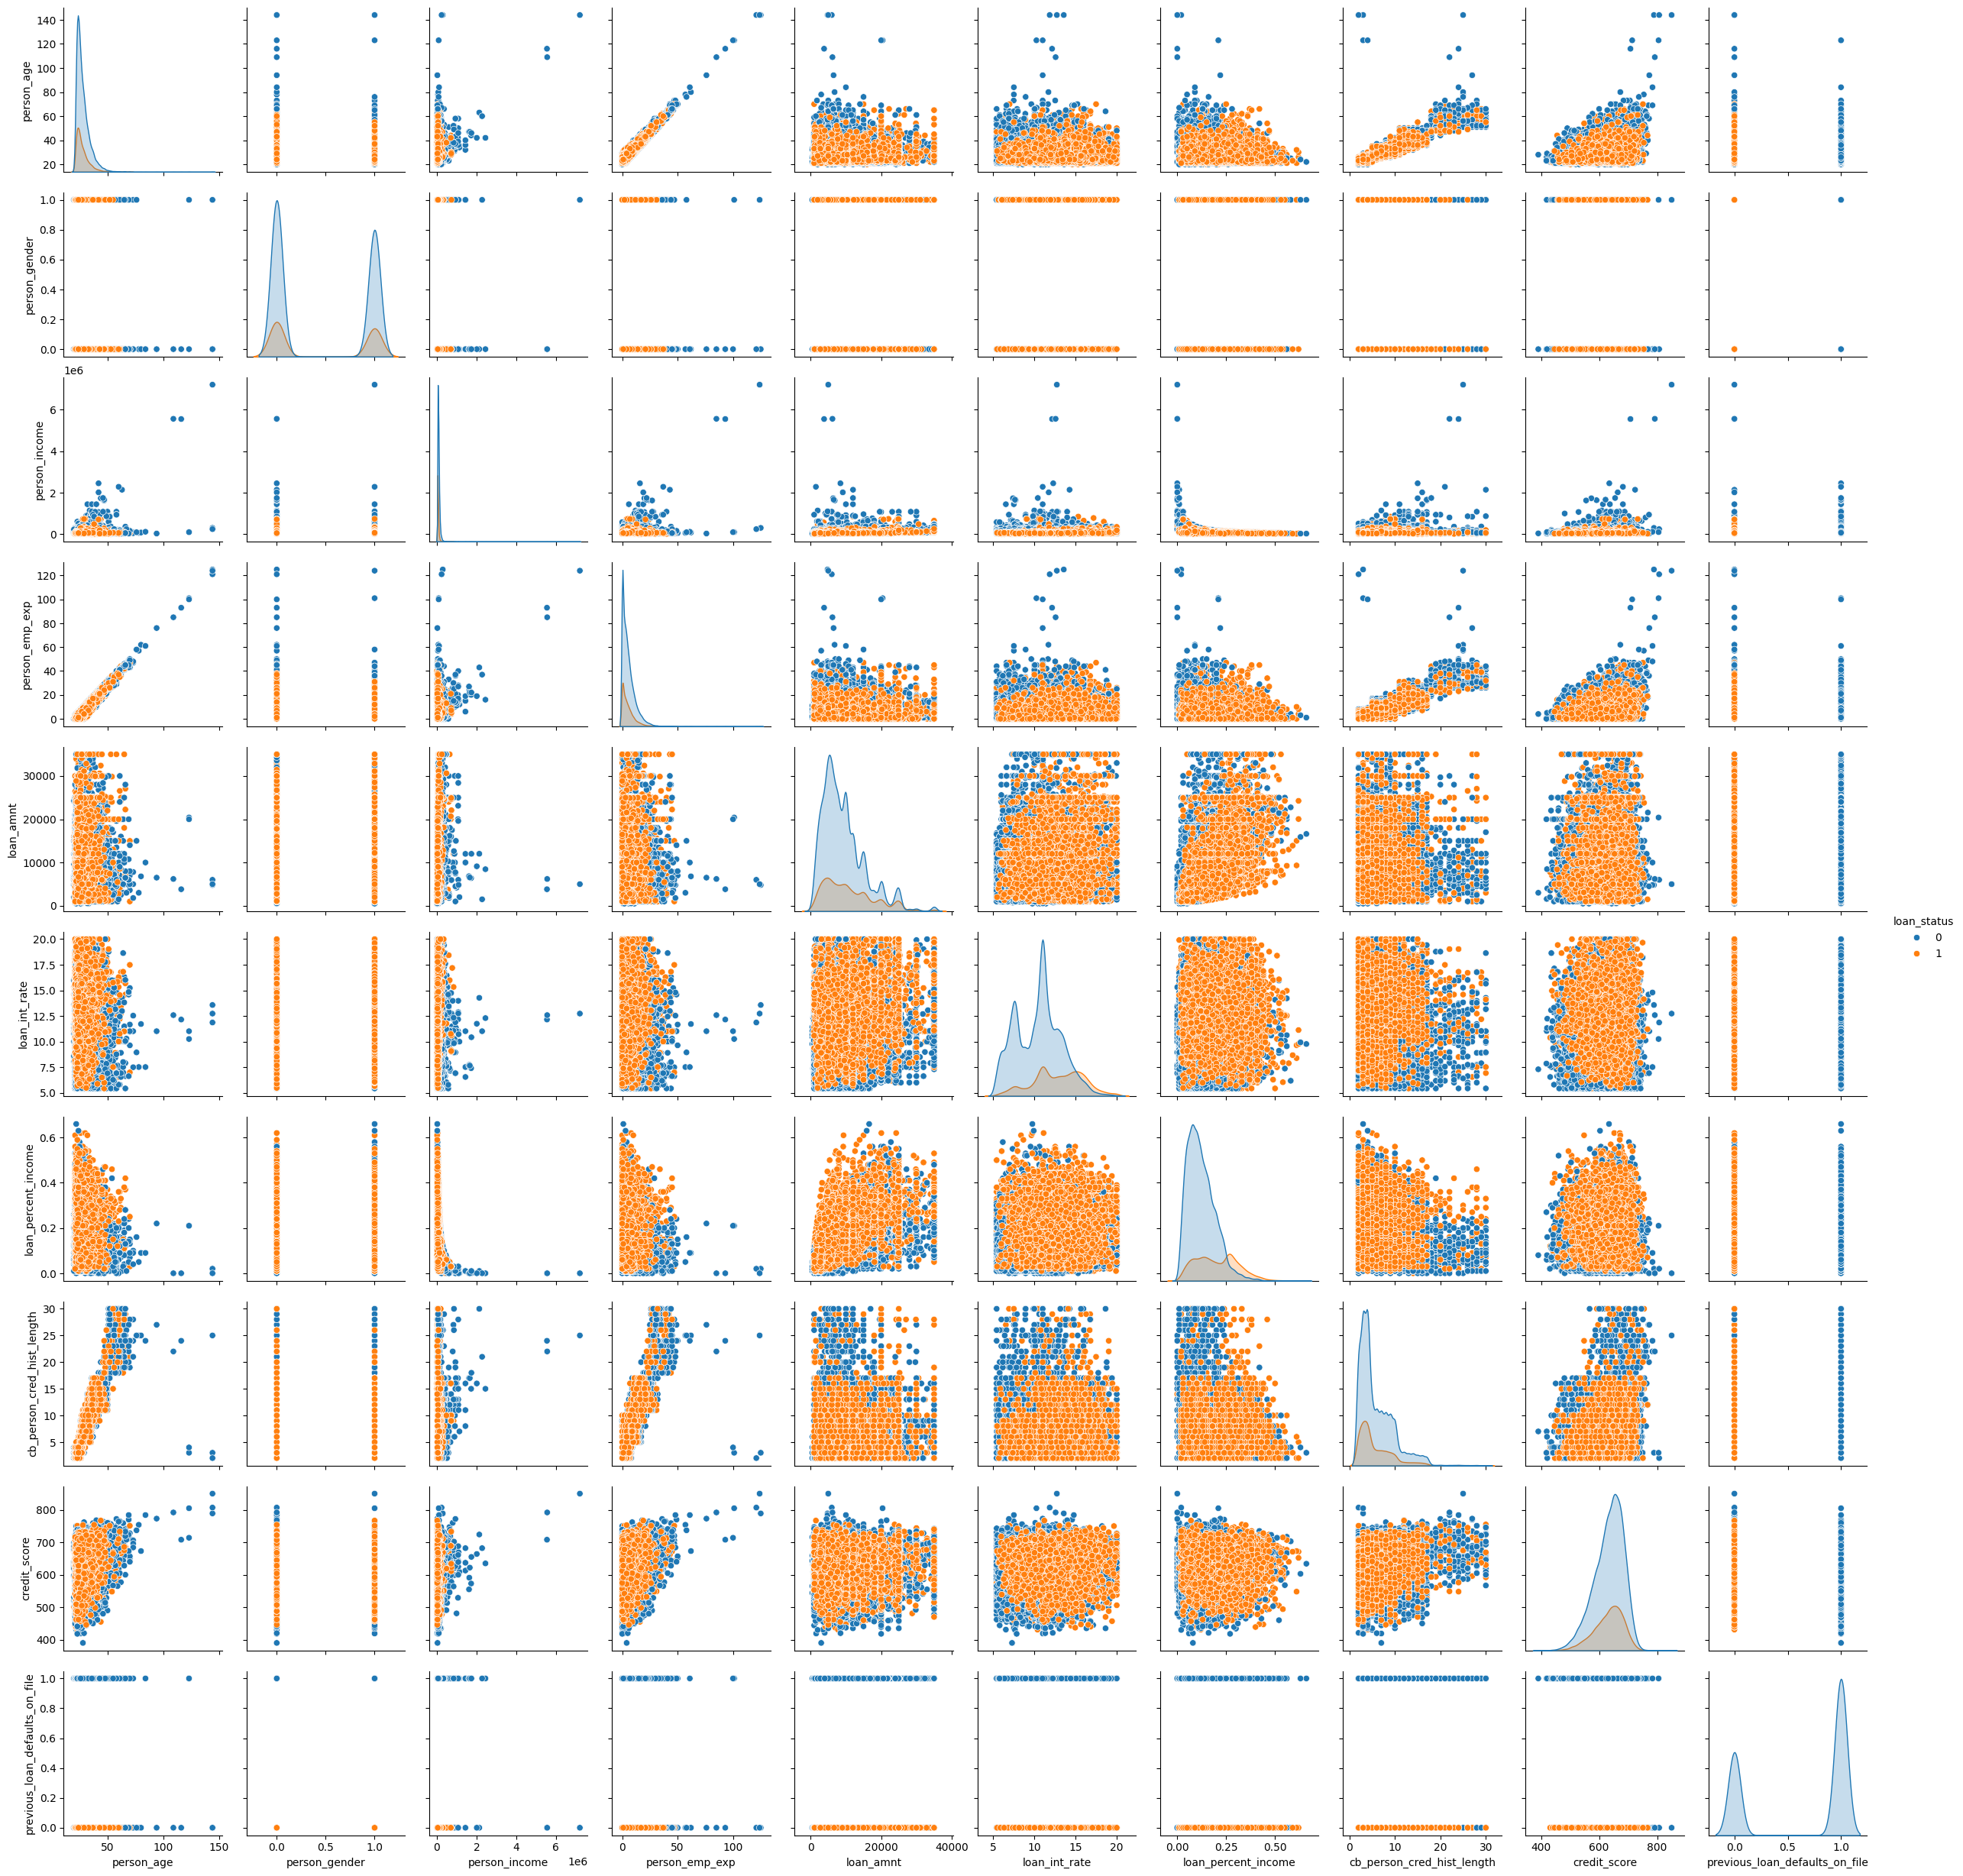

In [31]:
sns.pairplot(data, hue="loan_status")
plt.show()

# Model

In [32]:
X = data.drop("loan_status", axis=1)
y = data["loan_status"]

## Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [35]:
categorical = [col for col in X_train.columns if X_train[col].dtype == "O"]

In [36]:
categorical

['person_education', 'person_home_ownership', 'loan_intent']

## One-Hot Encoder

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical)
    ], remainder="passthrough"
)

In [39]:
X_train_encoder = preprocessor.fit_transform(X_train)
X_test_encoder = preprocessor.transform(X_test)

In [40]:
X_train = pd.DataFrame(X_train_encoder, columns=preprocessor.get_feature_names_out(), index=X_train.index)
X_test = pd.DataFrame(X_test_encoder, columns=preprocessor.get_feature_names_out(), index=X_test.index)

In [41]:
X_train

,cat__person_education_Bachelor,cat__person_education_Doctorate,cat__person_education_High School,cat__person_education_Master,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,...,remainder__person_age,remainder__person_gender,remainder__person_income,remainder__person_emp_exp,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__credit_score,remainder__previous_loan_defaults_on_file
1840,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,25.0,0.0,115979.0,0.0,15000.0,11.58,0.13,4.0,618.0,1.0
17786,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,25.0,1.0,85111.0,5.0,16000.0,12.18,0.19,4.0,572.0,1.0
3582,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,23.0,1.0,73194.0,0.0,3600.0,7.90,0.05,2.0,659.0,1.0
8750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,0.0,73261.0,0.0,6000.0,8.90,0.08,4.0,681.0,1.0
39752,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,31.0,1.0,76236.0,6.0,3194.0,11.10,0.04,8.0,663.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35483,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,23.0,1.0,37101.0,0.0,6000.0,12.32,0.16,4.0,682.0,0.0
39296,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,40.0,0.0,115106.0,18.0,21548.0,13.98,0.19,12.0,768.0,0.0
2693,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,25.0,0.0,41795.0,2.0,10000.0,15.31,0.24,4.0,668.0,1.0
8076,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,25.0,1.0,67327.0,3.0,7200.0,15.27,0.11,3.0,597.0,1.0


In [42]:
X_test

,cat__person_education_Bachelor,cat__person_education_Doctorate,cat__person_education_High School,cat__person_education_Master,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,cat__loan_intent_EDUCATION,cat__loan_intent_HOMEIMPROVEMENT,cat__loan_intent_MEDICAL,...,remainder__person_age,remainder__person_gender,remainder__person_income,remainder__person_emp_exp,remainder__loan_amnt,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length,remainder__credit_score,remainder__previous_loan_defaults_on_file
37134,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,34.0,1.0,121055.0,12.0,15000.0,8.59,0.12,10.0,693.0,1.0
25156,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,30.0,0.0,96727.0,6.0,8000.0,15.05,0.08,5.0,660.0,1.0
33230,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,24.0,1.0,84979.0,3.0,10000.0,9.64,0.12,4.0,662.0,1.0
18718,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,30.0,1.0,61048.0,12.0,16000.0,16.77,0.26,5.0,698.0,0.0
36677,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,25.0,0.0,41329.0,2.0,5500.0,11.01,0.13,3.0,625.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29835,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,37.0,0.0,76644.0,14.0,4000.0,11.01,0.05,13.0,647.0,0.0
399,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,23.0,0.0,173511.0,0.0,24250.0,11.83,0.14,3.0,631.0,1.0
19299,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,27.0,0.0,58006.0,4.0,2500.0,7.88,0.04,5.0,536.0,1.0
21241,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,0.0,56063.0,7.0,6000.0,11.49,0.11,5.0,657.0,0.0


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
def calculate_model_metrics(true, predicted):
    accuracy = accuracy_score(true, predicted)
    matrix = confusion_matrix(true, predicted)
    report = classification_report(true, predicted)
    return  accuracy,matrix, report

## Tree-based Models

In [46]:
tree_models = {
    "AdaBoost": AdaBoostClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
}

In [47]:
for i in range(len(list(tree_models))):
    model = list(tree_models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    modeltree_train_accuracy, modeltree_train_matrix, modeltree_train_report = calculate_model_metrics(y_train, y_train_pred)
    modeltree_test_accuracy, modeltree_test_matrix, modeltree_test_report = calculate_model_metrics(y_test, y_test_pred)

    print(list(tree_models.values())[i])

    print("Evaluation for Training Set")
    print("Accuracy Score :", modeltree_train_accuracy)
    print("Confusion Matrix :\n", modeltree_train_matrix)
    print("Classification Report :\n", modeltree_train_report)

    print("------------------------")

    print("Evaluation for Test Set")
    print("Accuracy Score :", modeltree_test_accuracy)
    print("Confusion Matrix :\n", modeltree_test_matrix)
    print("Classification Report :\n", modeltree_test_report)

    print("------------------------")
    print("\n")

AdaBoostClassifier()
Evaluation for Training Set
Accuracy Score : 0.9111111111111111
Confusion Matrix :
 [[23299  1266]
 [ 1534  5401]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     24565
           1       0.81      0.78      0.79      6935

    accuracy                           0.91     31500
   macro avg       0.87      0.86      0.87     31500
weighted avg       0.91      0.91      0.91     31500

------------------------
Evaluation for Test Set
Accuracy Score : 0.9079259259259259
Confusion Matrix :
 [[9841  594]
 [ 649 2416]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10435
           1       0.80      0.79      0.80      3065

    accuracy                           0.91     13500
   macro avg       0.87      0.87      0.87     13500
weighted avg       0.91      0.91      0.91     13500

------------------------


D

| **Model**                      | **Train Accuracy** | **Test Accuracy** | **Precision (1)** | **Recall (1)** | **F1-Score (1)** | **Overfitting Tendency** |
|--------------------------------|--------------------|-------------------|-------------------|----------------|------------------|--------------------------|
| **AdaBoostClassifier**         | 0.9111             | 0.9079            | 0.80              | 0.79           | 0.80             | Low                      |
| **DecisionTreeClassifier**     | 1.0000             | 0.8977            | 0.78              | 0.77           | 0.77             | **High**                 |
| **RandomForestClassifier**     | 1.0000             | 0.9244            | 0.90              | 0.75           | 0.82             | **Medium**               |
| **GradientBoostingClassifier** | 0.9277             | 0.9198            | 0.87              | 0.76           | 0.81             | Low-Medium               |
| **XGBClassifier**              | 0.9713             | 0.9301            | 0.88              | 0.80           | 0.84             | **Medium**               |
| **LGBMClassifier**             | 0.9509             | 0.9288            | 0.89              | 0.79           | 0.83             | **Medium**               |

> To reduce overfitting and improve model performance, **Decision Tree (DT), Random Forest (RF), XGBoost (XGB), and LightGBM (LGBM)** models will undergo hyperparameter tuning.


## Tree-based Models Hyperparameter Tuning (DT - RF - XGB - LGBM)

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://xgboost.readthedocs.io/en/stable/parameter.html
# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

dt_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [1,2,3,4,5,15, None],
    "max_features": ["sqrt", "log2", None],
}
rf_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5,8,10,15,None],
    "max_features": ["sqrt","log2", 5, 7],
    "min_samples_split": [2, 8, 10],
    "n_estimators": [100, 200, 500]
}
XGB_params = {
    "n_estimators": [100, 150, 200, 500],
    "learning_rate": [0.01, 0.1, 0.3],
    "max_depth": [3, 5, 7, 15],
    "colsample_bytree": [0.2, 0.3, 0.4, 0.8, 1]
}
LGBM_params = {
    "n_estimators": [100, 300, 500, 1000],
    "max_depth": [3, 5, 7, None],
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "colsample_bytree": [0.6,0.8, 1.0]
}

In [51]:
rscv_treemodels = [
    ("Decision Tree", DecisionTreeClassifier(), dt_params),
    ("Random Forest", RandomForestClassifier(), rf_params),
]

In [52]:
for name, model, params, in rscv_treemodels:
    randomcv_treemodels = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=20, cv=5, verbose=2, n_jobs=-1, scoring="accuracy")
    randomcv_treemodels.fit(X_train, y_train)
    print("Best params for: ", name, randomcv_treemodels.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END criterion=entropy, max_depth=4, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, splitter=random; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END criterion=log_loss, max_depth=15, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=log_loss, max_depth=15, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, splitter=best; total time=   0.1s
[CV] END criterion=log_loss, max_depth=15, max_features=log2, splitter=random; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, splitter=random; tot

In [53]:
treemodels_hyper = {
    "Decision Tree": DecisionTreeClassifier(
        splitter = "random",
        max_features= None,
        max_depth= 15,
        criterion= "log_loss"),
    "Random Forest": RandomForestClassifier(
        n_estimators = 500,
        min_samples_split = 8,
        max_features = 5,
        max_depth = None,
        criterion= "entropy"
    )
}

In [54]:
for i in range(len(list(treemodels_hyper))):
    model = list(treemodels_hyper.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    modeltree_train_accuracy, modeltree_train_matrix, modeltree_train_report = calculate_model_metrics(y_train, y_train_pred)
    modeltree_test_accuracy, modeltree_test_matrix, modeltree_test_report = calculate_model_metrics(y_test, y_test_pred)

    print(list(treemodels_hyper.values())[i])

    print("Evaluation for Training Set")
    print("Accuracy Score :", modeltree_train_accuracy)
    print("Confusion Matrix :\n", modeltree_train_matrix)
    print("Classification Report :\n", modeltree_train_report)

    print("------------------------")

    print("Evaluation for Test Set")
    print("Accuracy Score :", modeltree_test_accuracy)
    print("Confusion Matrix :\n", modeltree_test_matrix)
    print("Classification Report :\n", modeltree_test_report)

    print("------------------------")
    print("\n")

DecisionTreeClassifier(criterion='log_loss', max_depth=15, splitter='random')
Evaluation for Training Set
Accuracy Score : 0.9486666666666667
Confusion Matrix :
 [[24161   404]
 [ 1213  5722]]
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     24565
           1       0.93      0.83      0.88      6935

    accuracy                           0.95     31500
   macro avg       0.94      0.90      0.92     31500
weighted avg       0.95      0.95      0.95     31500

------------------------
Evaluation for Test Set
Accuracy Score : 0.9005185185185185
Confusion Matrix :
 [[9945  490]
 [ 853 2212]]
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     10435
           1       0.82      0.72      0.77      3065

    accuracy                           0.90     13500
   macro avg       0.87      0.84      0.85     13500
weighted avg       0.90   

| **Model**              | **Train Accuracy** | **Test Accuracy** | **Precision (1)** | **Recall (1)** | **F1-Score (1)** | **Overfitting Tendency** |
|------------------------|--------------------|-------------------|-------------------|----------------|------------------|--------------------------|
| DecisionTreeClassifier | 0.9504             | 0.9039            | 0.82              | 0.74           | 0.78             | **Decreased**            |
| RandomForestClassifier | 0.9878             | 0.9261            | 0.90              | 0.76           | 0.82             | **Decreased**            |
| XGBClassifier          | 0.9465             | 0.9299            | 0.88              | 0.80           | 0.84             | **Decreased**            |
| **LGBMClassifier**     | 0.9793             | **0.9306**        | 0.88              | 0.80           | 0.84             | **Decreased**            |

> After hyperparameter tuning, overfitting tendency has decreased and model performance has improved for **Decision Tree (DT), Random Forest (RF), XGBoost (XGB), and LightGBM (LGBM)**.
> **Best Model**: `LightGBM (LGBMClassifier)` is selected as the best model due to its highest test accuracy (0.9306), balanced F1-score and recall for the minority class, and reduced overfitting compared to other models.


## Pipeline - Standard Scaler (KNN - SVC)

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

> Two different pipeline strategies were used based on the type of model. For scale-sensitive models such as **K-Nearest Neighbors (KNN)** and **Support Vector Classifier (SVC)**, a Pipeline including **StandardScaler** was applied to normalize the features before model training. GaussianNB, which is not sensitive to feature scaling, was used without scaling.
>
> On the other hand, tree-based models including Decision Tree, Random Forest, XGBoost, and LightGBM are inherently insensitive to feature scaling, so they were trained directly without a scaler in a single pipeline. This approach ensures that each model type receives preprocessing appropriate to its characteristics, improving performance and stability.

In [56]:
models_pipeline = {
    "KNN": Pipeline([
        ('Scaler', StandardScaler()),
        ('KNN', KNeighborsClassifier())
    ]),
    "GaussianNB": Pipeline([
        ('GNB', GaussianNB())
    ]),
    "SVC": Pipeline([
        ('Scaler', StandardScaler()),
        ('SVC', SVC())
    ])
}

In [57]:
for name, model in models_pipeline.items():
    model.fit(X_train, y_train)

    y_train_pred_pipeline = model.predict(X_train)
    y_test_pred_pipeline = model.predict(X_test)

    modelspipeline_train_accuracy, modelspipeline_train_matrix, modelspipeline_train_report = calculate_model_metrics(y_train, y_train_pred_pipeline)
    modelspipeline_test_accuracy, modelspipeline_test_matrix, modelspipeline_test_report = calculate_model_metrics(y_test, y_test_pred_pipeline)

    print(f"--- {name} ---")

    print("Evaluation for Training Set")
    print("Accuracy Score :", modelspipeline_train_accuracy)
    print("Confusion Matrix :\n", modelspipeline_train_matrix)
    print("Classification Report :\n", modelspipeline_train_report)

    print("------------------------")

    print("Evaluation for Test Set")
    print("Accuracy Score :", modelspipeline_test_accuracy)
    print("Confusion Matrix :\n", modelspipeline_test_matrix)
    print("Classification Report :\n", modelspipeline_test_report)

    print("------------------------")
    print("\n")

--- KNN ---
Evaluation for Training Set
Accuracy Score : 0.9261587301587302
Confusion Matrix :
 [[23821   744]
 [ 1582  5353]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     24565
           1       0.88      0.77      0.82      6935

    accuracy                           0.93     31500
   macro avg       0.91      0.87      0.89     31500
weighted avg       0.92      0.93      0.92     31500

------------------------
Evaluation for Test Set
Accuracy Score : 0.8865925925925926
Confusion Matrix :
 [[9865  570]
 [ 961 2104]]
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     10435
           1       0.79      0.69      0.73      3065

    accuracy                           0.89     13500
   macro avg       0.85      0.82      0.83     13500
weighted avg       0.88      0.89      0.88     13500

------------------------


--- Gaussi

| **Model**      | **Train Accuracy** | **Test Accuracy** | **Precision (1)** | **Recall (1)** | **F1-Score (1)** | **Overfitting**                  |
|----------------|--------------------|-------------------|-------------------|----------------|------------------|----------------------------------|
| **KNN**        | 0.9262             | 0.8866            | 0.79              | 0.69           | 0.73             | **Slight overfitting**           |
| **GaussianNB** | 0.8066             | 0.7997            | 0.66              | 0.25           | 0.36             | **No overfitting** |
| **SVC**        | 0.9234             | 0.9113            | 0.85              | 0.74           | 0.79             | **Minimal overfitting**          |

> Since overfitting was observed in the KNN and SVC models, hyperparameter tuning will be applied to reduce overfitting and improve overall model performance.

## Hyperparameter Tuning (KNN - SVC)

In [58]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

knn_params = {
    "KNN__n_neighbors": [5, 10, 15, 20, 25, 30],
    "KNN__weights": ["uniform", "distance"],
    "KNN__algorithm": ["auto", "brute"]
}

svc_params = {
    "SVC__C": [0.01, 0.1, 1, 10],
    "SVC__kernel": ["linear", "rbf"],
    "SVC__gamma": ["scale"]
}

In [59]:
rscv_modelspipeline_hyper = [
    ("KNN", Pipeline([
        ('Scaler', StandardScaler()),
        ('KNN', KNeighborsClassifier())
    ]), knn_params),

    ("SVC", Pipeline([
        ('Scaler', StandardScaler()),
        ('SVC', SVC())
    ]), svc_params),
]

In [60]:
for name, model, params, in rscv_modelspipeline_hyper:
    randomcv_modelsPipeline = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=8, cv=5, verbose=2, n_jobs=-1, scoring="accuracy")
    randomcv_modelsPipeline.fit(X_train, y_train)
    print("Best params for: ", name, randomcv_modelsPipeline.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END KNN__algorithm=brute, KNN__n_neighbors=10, KNN__weights=distance; total time=   1.2s
[CV] END KNN__algorithm=brute, KNN__n_neighbors=10, KNN__weights=distance; total time=   1.2s
[CV] END KNN__algorithm=brute, KNN__n_neighbors=10, KNN__weights=distance; total time=   1.2s
[CV] END KNN__algorithm=brute, KNN__n_neighbors=20, KNN__weights=distance; total time=   1.3s
[CV] END KNN__algorithm=brute, KNN__n_neighbors=20, KNN__weights=distance; total time=   1.3s
[CV] END KNN__algorithm=brute, KNN__n_neighbors=10, KNN__weights=distance; total time=   1.2s
[CV] END KNN__algorithm=auto, KNN__n_neighbors=5, KNN__weights=distance; total time=   1.2s
[CV] END KNN__algorithm=auto, KNN__n_neighbors=5, KNN__weights=distance; total time=   1.2s
[CV] END KNN__algorithm=brute, KNN__n_neighbors=20, KNN__weights=distance; total time=   1.4s
[CV] END KNN__algorithm=brute, KNN__n_neighbors=20, KNN__weights=distance; total time=   1.3s
[CV]

In [61]:
modelspipeline_hyper = {
    "KNN" : KNeighborsClassifier(
        weights="distance",
        n_neighbors = 25,
        algorithm="brute"
    ),
    "SVC" : SVC(
        kernel="rbf",
        gamma="scale",
        C=5
    )
}

In [62]:
for i in range(len(list(modelspipeline_hyper))):
    model = list(modelspipeline_hyper.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    modelsPipHyper_train_accuracy, modelsPipHyper_train_matrix, modelsPipHyper_train_report = calculate_model_metrics(y_train, y_train_pred)
    modelsPipHyper_test_accuracy, modelsPipHyper_test_matrix, modelsPipHyper_test_report = calculate_model_metrics(y_test, y_test_pred)

    print(list(modelspipeline_hyper.values())[i])

    print("Evaluation for Training Set")
    print("Accuracy Score :", modelsPipHyper_train_accuracy)
    print("Confusion Matrix :\n", modelsPipHyper_train_matrix)
    print("Classification Report :\n", modelsPipHyper_train_report)

    print("------------------------")

    print("Evaluation for Test Set")
    print("Accuracy Score :", modelsPipHyper_test_accuracy)
    print("Confusion Matrix :\n", modelsPipHyper_test_matrix)
    print("Classification Report :\n", modelsPipHyper_test_report)

    print("------------------------")
    print("\n")

KNeighborsClassifier(algorithm='brute', n_neighbors=25, weights='distance')
Evaluation for Training Set
Accuracy Score : 1.0
Confusion Matrix :
 [[24565     0]
 [    0  6935]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24565
           1       1.00      1.00      1.00      6935

    accuracy                           1.00     31500
   macro avg       1.00      1.00      1.00     31500
weighted avg       1.00      1.00      1.00     31500

------------------------
Evaluation for Test Set
Accuracy Score : 0.841925925925926
Confusion Matrix :
 [[9846  589]
 [1545 1520]]
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     10435
           1       0.72      0.50      0.59      3065

    accuracy                           0.84     13500
   macro avg       0.79      0.72      0.74     13500
weighted avg       0.83      0.84      0.83 

| **Model**                                    | **Train Accuracy** | **Test Accuracy** | **Precision (1)** | **Recall (1)** | **F1-Score (1)** | **Overfitting**                   |
|----------------------------------------------|--------------------|-------------------|-------------------|----------------|------------------|-----------------------------------|
| **KNN (n_neighbors=25, weights='distance')** | 1.0000             | 0.8419            | 0.72              | 0.50           | 0.59             | **Severe overfitting**            |
| **SVC (C=5)**                                | 0.8150             | 0.8083            | 0.76              | 0.23           | 0.35             | **No overfitting (underfitting)** |

> After hyperparameter tuning, the **KNN** model showed signs of severe overfitting, achieving perfect training accuracy but significantly lower test performance.
> On the other hand, the **SVC** model experienced underfitting, with both training and test scores remaining relatively low.

> Multiple hyperparameter combinations were tested for both KNN and SVC models. However, the tuning process did not lead to any significant improvement — in fact, it either produced similar results or increased overfitting. Therefore, hyperparameter tuning did not contribute positively to the performance of these models.

